### EDA 

- Data is a fictional dataset provided by PGP-DSBA-UTA-SEP21-D

- Code & Analysis - Randall Gann

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Housekeeping
pd.set_option("display.precision", 2)
pd.set_option("display.expand_frame_repr", False)
#pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [4]:
# read the data and copy to preserve an unaltered version
df = pd.read_csv('foodhub_order.csv')
foodhub = df.copy()
# returns the first 5 rows
foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [5]:
# geat the shape of the data
foodhub.shape

(1898, 9)

In [6]:
# check for null values
foodhub.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
1. dataframe has 1898 rows(observations) and 9 columns(variables)
2. data has 0 null values

In [7]:
# use info() to print a concise summary of the DataFrame
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
1. int types(order,customer,food_prep,delivery)
2. float types(cost)
3. object types(name,cuisine,day,rating)

In [9]:
# coverting "objects" to "category" reduces the data space required to store the dataframe
# converting 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
foodhub['restaurant_name'] = foodhub.restaurant_name.astype('category')
foodhub['cuisine_type'] = foodhub.cuisine_type.astype('category')
foodhub['day_of_the_week'] = foodhub.day_of_the_week.astype('category')
# concise summary of the DataFrame
foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:

Converted 3 columns to categorical data

In [10]:
# Let's explore order_id and customer_id
print(foodhub.order_id.nunique())
print(foodhub.customer_id.nunique())

1898
1200


# Observations:

1. there are 1898 unique orders represented in the dataset
2. of those 1898 unique orders, only 1200 unique customer_id's represented
3. 1898 - 1200 = 698 repeat customers
4. 698 / 1898 * 100 = 36.77% of the orders were made by repeat customers

In [11]:
# set precision 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# show summary stats
foodhub.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
1.    **Cost of order**<br>
<br>
average is \$16.50, with a \$7.48 standard deviation<br>
range of \$4.47 - \$35.41<br> 
<br>
2. **Food Preparation Time**<br>
<br>
average is 27 minutes, with a 5 minute standard deviation<br>
range of 20 - 35 minutes<br>     
<br>
3. **Delivery Time**<br>
<br>
average is 24 minutes, with a 5 minute standard deviation<br>
range is 15 - 33 minutes<br>  
<br>
4. standard deviation for all variables is low, so our data is not very spread out
5. order id and customer id are categorical in nature thus unimportant in this context

In [12]:
# count the number of 'Not given' values in rating columns
foodhub['rating'].str.count('Not given').sum()
df['rating'].value_counts(1)

Not given   0.39
5           0.31
4           0.20
3           0.10
Name: rating, dtype: float64

#### Observations:
736 observations out of 1898 are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [13]:
# Housekeeping
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('rainbow')

In [14]:
# here we create a function for drawing the hist/box plots to make our code cleaner
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxlot and histogram combined
    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the denisty curve (default False)
    bins: number of bins for the histogram (default None)
    """
    # here we create the subplots before we fill them with something
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2, # number of rows of the subplot grid
        sharex=True, # x axis will be shared among the plots
        gridspec_kw={'height_ratios': (0.25, 0.754)},
        figsize=figsize,
    )
    # we assign the boxplot to the first row of the subplot
    # ax here indicates the Axes object to draw the plot onto - created above
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color='violet'
    )
    # create the histogram and then apply the median and mean lines
    sns.histplot(
        data=data, x=feature, ax=ax_hist2, bins=bins, palette='winter'
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data[feature].mean(), color='green', linestyle='--'
    )
    ax_hist2.axvline(
        data[feature].median(), color='black', linestyle='-'
    )

#### For each variabel I have two plots.  One created manually and one using the function call technique.

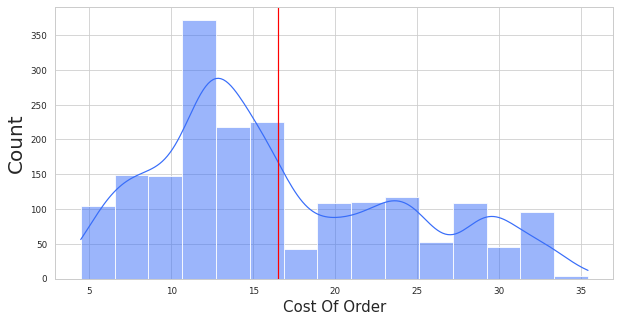

In [15]:
# Cost of Order
plt.figure(figsize=(10, 5));
sns.histplot(data=foodhub, x='cost_of_the_order', bins=15, kde=True);
plt.xlabel('Cost Of Order', size=15);
plt.ylabel('Count', size=20);
plt.axvline(x=foodhub.cost_of_the_order.mean(), color='red');

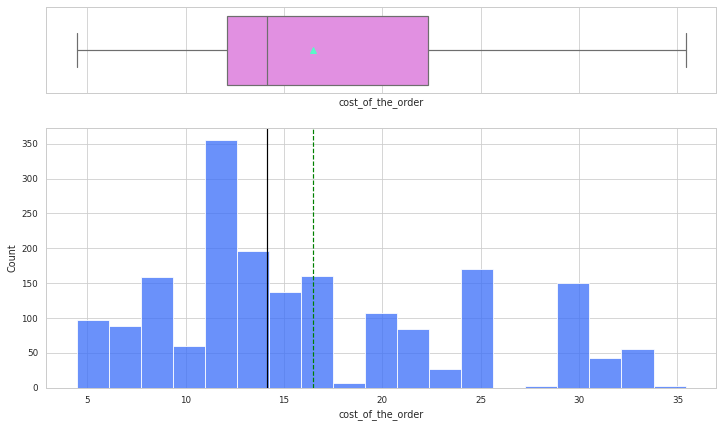

In [16]:
histogram_boxplot(foodhub, 'cost_of_the_order')

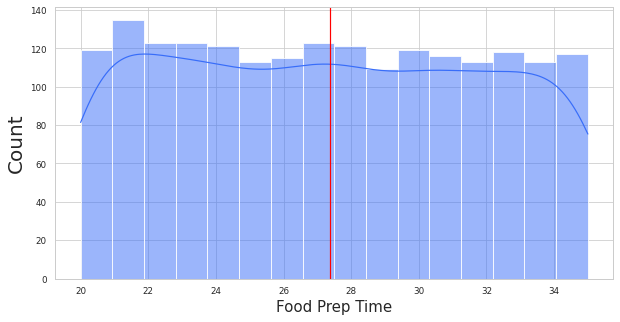

In [17]:
# Food Prep Time
plt.figure(figsize=(10, 5));
sns.histplot(data=foodhub, x='food_preparation_time', bins=16, kde=True);
plt.xlabel('Food Prep Time', size=15);
plt.ylabel('Count', size=20);
plt.axvline(x=foodhub.food_preparation_time.mean(), color='red');

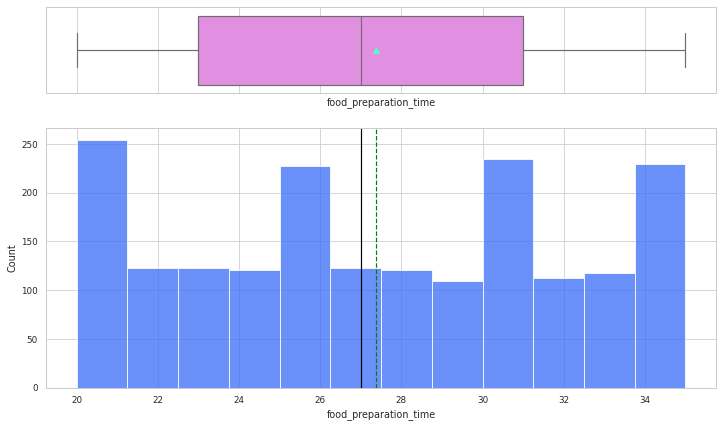

In [18]:
histogram_boxplot(foodhub, 'food_preparation_time')

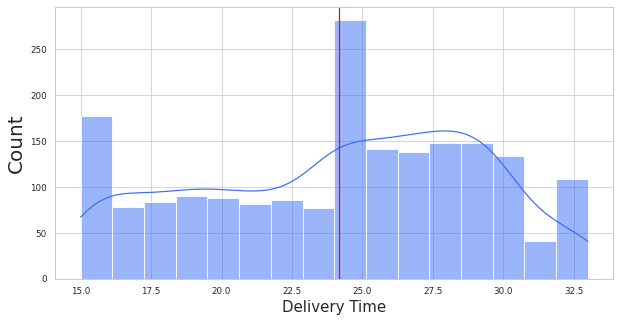

In [19]:
# Delivery Time
plt.figure(figsize=(10, 5));
sns.histplot(data=foodhub, x='delivery_time', bins=16, kde=True);
plt.xlabel('Delivery Time', size=15);
plt.ylabel('Count', size=20);
plt.axvline(x=foodhub.delivery_time.mean(), color='red');

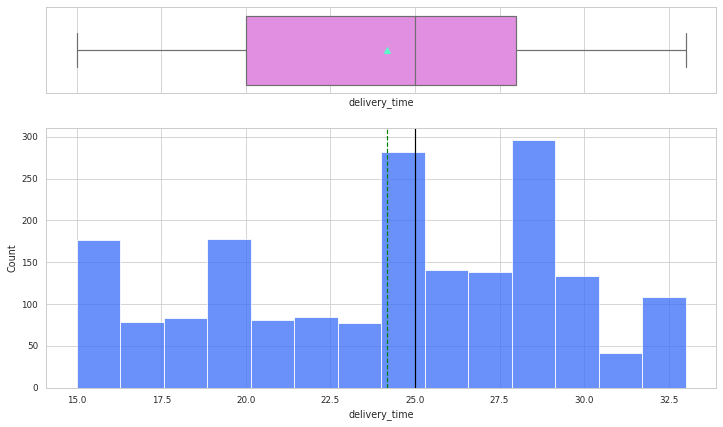

In [20]:
histogram_boxplot(foodhub, 'delivery_time')

In [21]:
# let's write a function that will create a labeled barplot

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of counts (default is Fasle)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    
    total = len(data[feature]) # gets the total number of observations in the column
    count = data[feature].nunique() # stores number of unique values
    if n is None:
        plt.figure(figsize=(count + 1, 5)) # uses count to configure size if n is none
    else:
        plt.figure(figsize=(n + 1, 5)) # uses n to configure size if n
        
    plt.xticks(rotation=90, fontsize=15) # rotate x labels and set size
    # build our countplot using passed in values
    ax = sns.countplot(
        data=data,
        x=feature,
        palette='Paired',
        # sets order of categories by taking the index of value counts and sorts
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            ) # percentage of each class of category
        else:
            label = p.get_height() # count of each level of the category
            
        x = p.get_x() + p.get_width() / 2 # width of the plot
        y = p.get_height() # height of the plot
        
        ax.annotate(
            label,
            (x, y),
            ha='center',
            va='center',
            size=12,
            xytext=(0, 5),
            textcoords='offset points',
        ) # annotate the percentage
        
    plt.show()

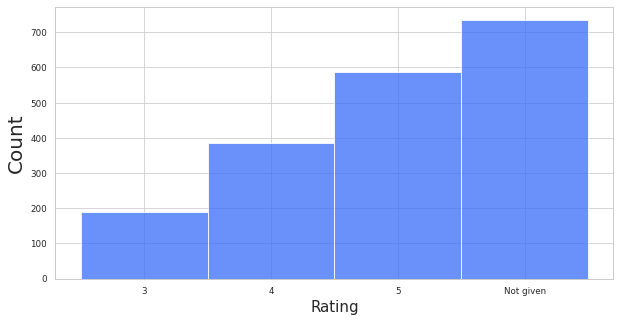

In [22]:
# Rating
foodhub['rating'] = pd.Categorical(foodhub['rating'], ['3', '4', '5', 'Not given'])
plt.figure(figsize=(10, 5));
sns.histplot(data=foodhub, x='rating');
plt.xlabel('Rating', size=15);
plt.ylabel('Count', size=20);

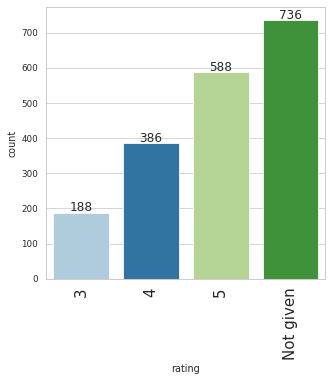

In [23]:
labeled_barplot(foodhub, 'rating')

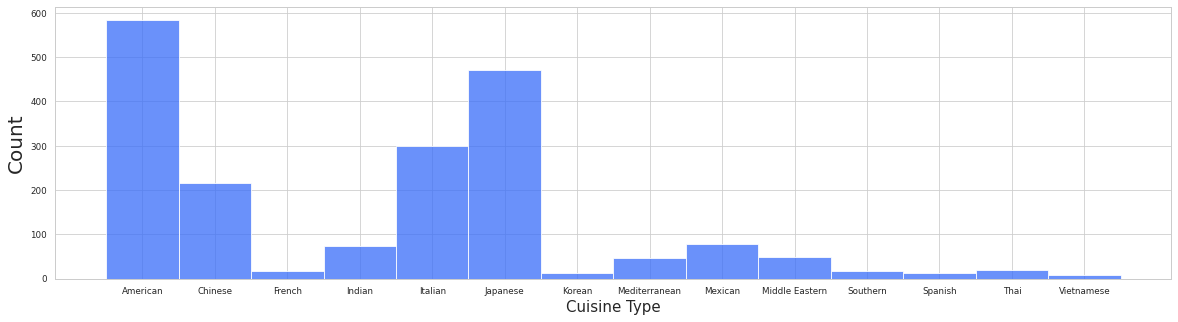

In [24]:
# Cuisine Type
plt.figure(figsize=(20, 5));
sns.histplot(foodhub.cuisine_type);
plt.xlabel('Cuisine Type', size=15);
plt.ylabel('Count', size=20);

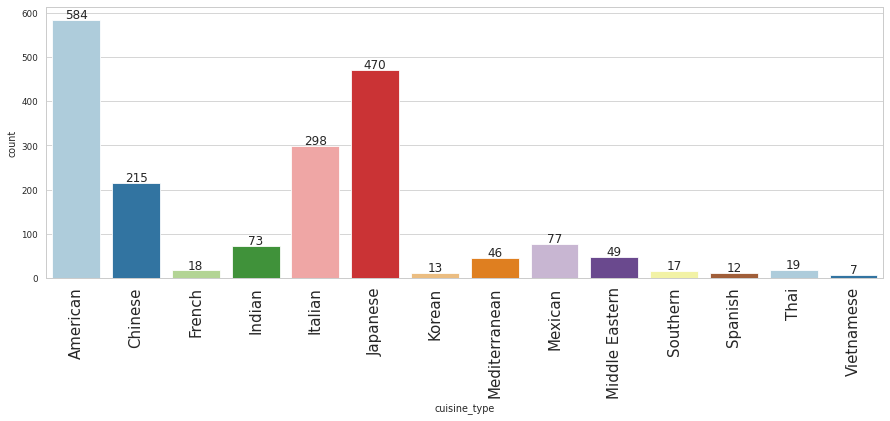

In [25]:
labeled_barplot(foodhub, 'cuisine_type')

#### Observations:
1. **cost of order**
    - has the highest number of observations in the \\$11-\\$12 range
    - a little positive skewness<br>
<br>  
2. **food prep time**
    - uniform distribution<br>
<br>
3. **delivery time**
    - again a fairly even distribution like food prep time
    - highest number of observations ocurring at the 24-25 minute timeframe<br>
<br>
4. **rating**
    - 'not given' represents the greatest amount of observations
    - 5, the highest rating, represents second in the number of times given<br>
<br>
5. **cuisine type**
    - american cuisine has the most observations in the dataset
    - japanese and italian round out the top 3 in number of orders

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


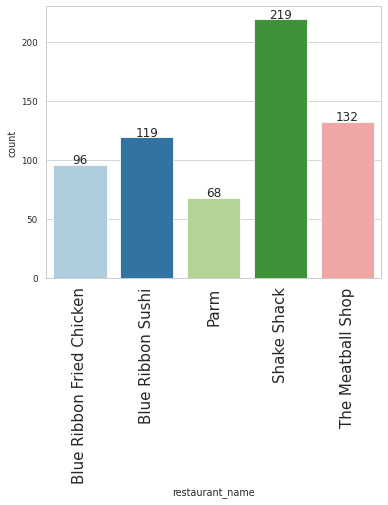

In [26]:
# print the top 5 by calling head() on value_counts()
print(foodhub['restaurant_name'].value_counts().head())

# print the graph of top 5 by calling labeled_barplot
labeled_barplot(foodhub, 'restaurant_name', n=5)

#### Observations:
1. Top 5 restaurants by number of orders - Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64


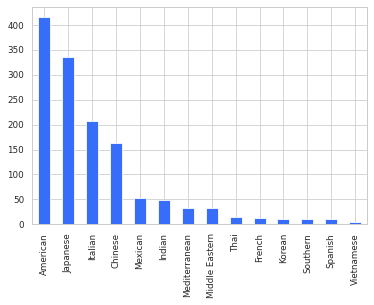

In [27]:
# create a new dataframe that applies a mask where day of week equals weekend
foodhub_weekend = foodhub[foodhub['day_of_the_week'] == 'Weekend']
print(foodhub_weekend['cuisine_type'].value_counts())
foodhub_weekend['cuisine_type'].value_counts().plot(kind='bar');

#### Observations:
American is the most popular cuisine on weekends.

In [28]:
# get total orders over 20 by filtering >20 and then accessing the proper index of shape
total_orders_over_20 = foodhub[foodhub['cost_of_the_order']>20].shape[0]
# calculate percentage of orders in the dataset
percentage = (total_orders_over_20 / foodhub.shape[0]) * 100
print(f'total orders over $20 - {total_orders_over_20}')
print(f'percentage of orders above $20 - {str(round(percentage, 2))}%')

total orders over $20 - 555
percentage of orders above $20 - 29.24%


In [29]:
# lets go ahead and calculate the percentage of orders from $0-$9.99 and $10-$20
temp_df = foodhub[foodhub['cost_of_the_order']<20]
total_orders_10_20 = temp_df[temp_df['cost_of_the_order']>10].shape[0]
perc_10_20 = (total_orders_10_20 / foodhub.shape[0]) * 100
print(f'total orders between $10-$20 - {total_orders_10_20}')
print(f'percentage of orders between $10-$20 - {str(round(perc_10_20, 2))}%')

total orders between $10-$20 - 949
percentage of orders between $10-$20 - 50.0%


In [30]:
total_orders_under_10 = foodhub[foodhub['cost_of_the_order']<10].shape[0]
perc_under_10 = (total_orders_under_10 / foodhub.shape[0]) * 100
print(f'total orders under $10 - {total_orders_under_10}')
print(f'percentage of order under $10 - {str(round(perc_under_10, 2))}%')

total orders under $10 - 394
percentage of order under $10 - 20.76%


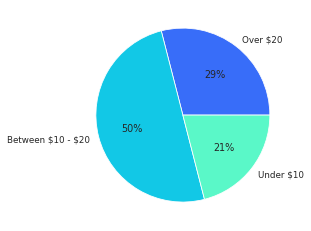

In [31]:
# plot a pie chart of these percentages
quantities = [29, 50, 21]
prices = ['Over $20', 'Between $10 - \$20', 'Under $10']
plt.pie(quantities, labels=prices, autopct='%.0f%%');

#### Observations:
1. 29.24% of the orders are over \\$20
2. total number of orders that were over \\$20 - 555

In [32]:
# take the mean() of delivery_time column
delivery_time_mean = foodhub['delivery_time'].mean()
print(f' mean delivery time over the entire dataset is {str(round(delivery_time_mean, 2))}')

 mean delivery time over the entire dataset is 24.16


#### Observations:
Mean delivery time is 24.16 minutes

In [33]:
# mask stores the series with a single True value representing the max
mask = foodhub['cost_of_the_order'] == foodhub['cost_of_the_order'].max()
# we apply the mask to the original dataframe and get the single max value as a new dataframe
max_cost_single_order = foodhub[mask]
max_cost_single_order

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:
1. order_id - 1477814
2. customer_id - 62359

### Multivariate Analysis

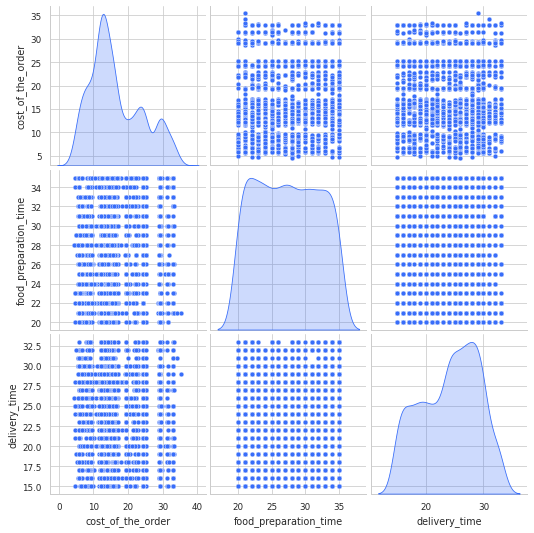

In [34]:
# show pairplot of variables
sns.pairplot(foodhub, vars=['cost_of_the_order', 'food_preparation_time', 'delivery_time'], diag_kind="kde");

In [35]:
foodhub.corr() # correlation matrix

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.00,-0.01,0.02,-0.01,0.01
customer_id,-0.01,1.00,-0.00,-0.03,-0.01
cost_of_the_order,0.02,-0.00,1.00,0.04,-0.03
food_preparation_time,-0.01,-0.03,0.04,1.00,0.01
delivery_time,0.01,-0.01,-0.03,0.01,1.00


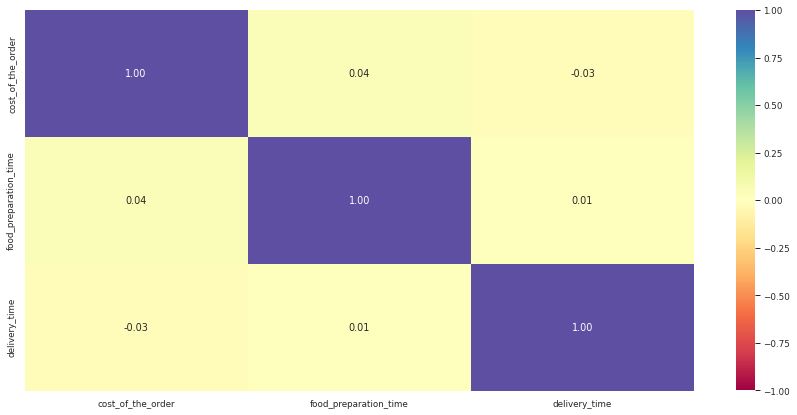

In [36]:
# Plot the heatmap
# we see the same thing here on the heatmap as above, no correlation
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Rating vs Delivery Time

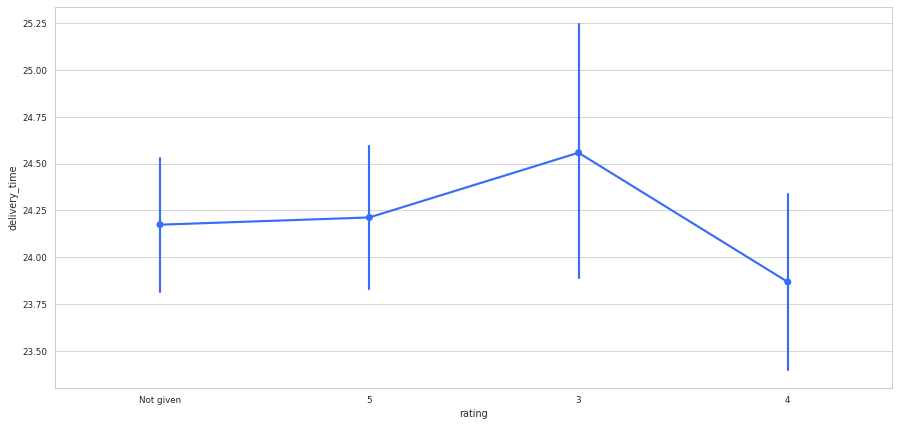

In [37]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs delivery time and day of week

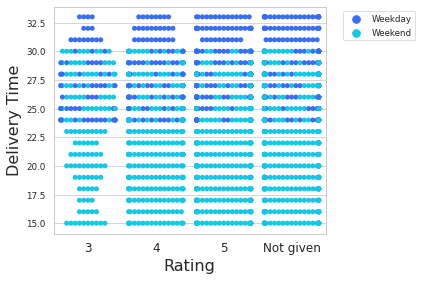

In [38]:
# Let's see if rating has any relationship to delivery time and day of week.
sns.swarmplot(x=foodhub['rating'], y=foodhub['delivery_time'], hue=foodhub['day_of_the_week']);
plt.xticks(size=12);
plt.ylabel('Delivery Time', size=16);
plt.xlabel('Rating', size=16);
plt.legend(bbox_to_anchor=(1.05, 1));
plt.tight_layout();

#### Rating vs Food Prep Time

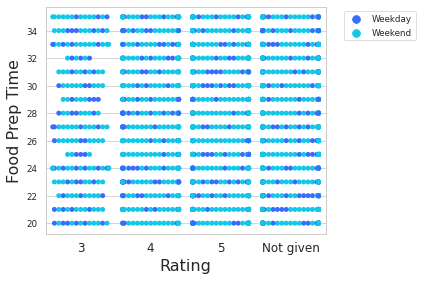

In [39]:
# Let's see if rating has any relationship to food prep and day of week.
sns.swarmplot(x=foodhub['rating'], y=foodhub['food_preparation_time'], hue=foodhub['day_of_the_week']);
plt.xticks(size=12);
plt.ylabel('Food Prep Time', size=16);
plt.xlabel('Rating', size=16);
plt.legend(bbox_to_anchor=(1.05, 1));
plt.tight_layout();

#### Cost of Order vs. Delivery Time

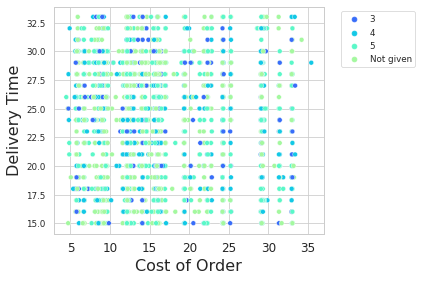

In [40]:
# Let's see if cost influences delivery time or rating given
sns.scatterplot(data=foodhub, x='cost_of_the_order', y='delivery_time', hue='rating');
plt.xticks(size=12);
plt.ylabel('Delivery Time', size=16);
plt.xlabel('Cost of Order', size=16);
plt.legend(bbox_to_anchor=(1.05, 1));
plt.tight_layout();

#### Cost of Order vs Cuisine Type

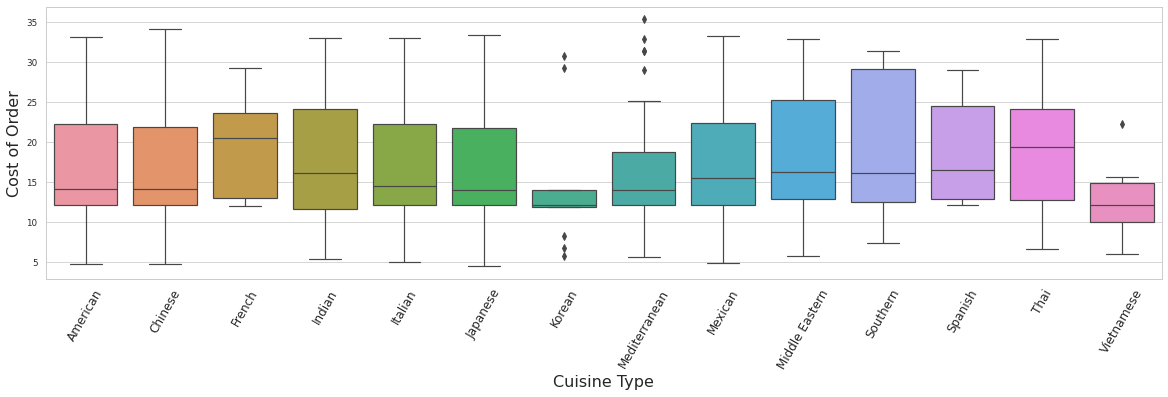

In [41]:
# boxplot the relationship between cuisine type and cost of order
plt.figure(figsize=(20, 5));
sns.boxplot(x='cuisine_type', y="cost_of_the_order", data=foodhub);
plt.xticks(rotation=60, size=12);
plt.ylabel('Cost of Order', size=16);
plt.xlabel('Cuisine Type', size=16);

#### Food Prep Time vs Cuisine Type

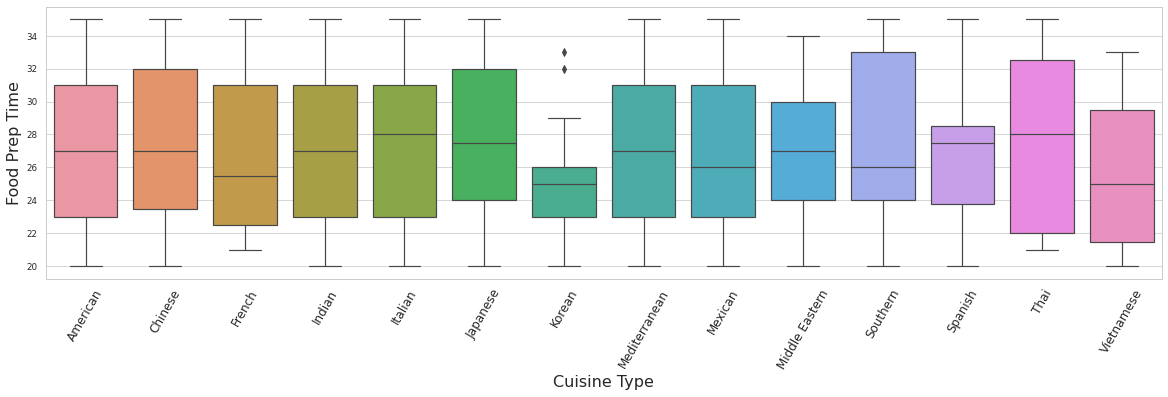

In [42]:
# boxplot the relationship between cuisine type and food prep time
plt.figure(figsize=(20, 5));
sns.boxplot(x='cuisine_type', y="food_preparation_time", data=foodhub);
plt.xticks(rotation=60, size=12);
plt.ylabel('Food Prep Time', size=16);
plt.xlabel('Cuisine Type', size=16);

#### Total Time vs Rating

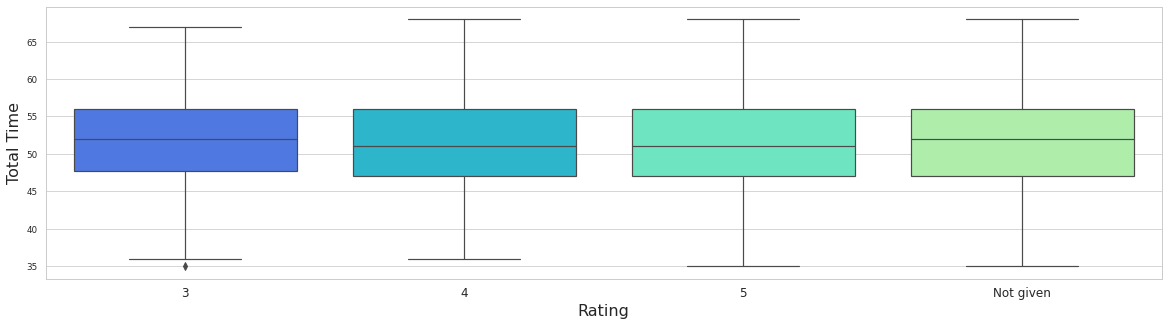

In [43]:
# Let's combine delivery time and food prep time and see if the total time influences rating
foodhub['total_time'] = foodhub['food_preparation_time'] + foodhub['delivery_time']
plt.figure(figsize=(20, 5));
sns.boxplot(x='rating', y='total_time', data=foodhub);
plt.xticks(size=12);
plt.ylabel('Total Time', size=16);
plt.xlabel('Rating', size=16);

#### Observations:
1. uniform distributions for all variables
2. correlation matrix confirms that no correlation exists
3. almost all below average delivery times happen on weekends
4. rating does not seem to be influenced by any of the other variables

#### Let's take a look at the revenue generated by the restaurants

In [44]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                     3579.53
The Meatball Shop               2145.21
Blue Ribbon Sushi               1903.95
Blue Ribbon Fried Chicken       1662.29
Parm                            1112.76
RedFarm Broadway                 965.13
RedFarm Hudson                   921.21
TAO                              834.50
Han Dynasty                      755.29
Blue Ribbon Sushi Bar & Grill    666.62
Rubirosa                         660.45
Sushi of Gari 46                 640.87
Nobu Next Door                   623.67
Five Guys Burgers and Fries      506.47
Name: cost_of_the_order, dtype: float64

In [45]:
# get restaurants with rating count of >50 and avg rating > 4

# remove the 'Not given' rows from the dataframe and create a new dataframe
promo_df = foodhub[foodhub['rating'] != 'Not given'].copy()
# set the rating values to int so that we can take the average
promo_df['rating'] = promo_df['rating'].astype('str').astype('int')
# save series such that restaurant_names with a rating count() > 50 get returned into it
series = promo_df.groupby('restaurant_name')['rating'].count()>50
# mask off the restaurants that are included in series and apply the mask creating a new promo_df
mask = promo_df['restaurant_name'].isin(series[series].index)
promo_df = promo_df[mask]
# update series to assign True values to those restaurants with rating average >4
series = promo_df.groupby('restaurant_name')['rating'].mean()>4
series[series]

restaurant_name
Blue Ribbon Fried Chicken    True
Blue Ribbon Sushi            True
Shake Shack                  True
The Meatball Shop            True
Name: rating, dtype: bool

#### Observations:
1. **PROMO OFFER RESTAURANTS**
    - Blue Ribbon Fried Chicken
    - Blue Ribbon Shushi
    - Shake Shack
    - The Meatball Shop

In [46]:
#for this to work rating needs to be changed to integer
df_rating = foodhub.groupby('restaurant_name').agg(['rating': ['count', 'mean']]).reset_index()

SyntaxError: invalid syntax (<ipython-input-46-cb27d44f358f>, line 2)

In [47]:
# add new column that stores company charges
foodhub['foodhub_charge'] = [order_cost * 0.25 if order_cost > 20 else
                             order_cost * 0.15 if order_cost >5 else 
                             0
                            for order_cost in foodhub['cost_of_the_order']]

# separate the two classes of charges
over20_df = foodhub[foodhub['cost_of_the_order']>20]
over20_rev = over20_df['foodhub_charge'].sum()
print(f'Total revenue generated by orders over $20 - {str(round(over20_rev, 2))}')

over5_df = foodhub[foodhub['cost_of_the_order']>5]
over5_df = over5_df[over5_df['cost_of_the_order']<20]
over5_rev = over5_df['foodhub_charge'].sum()
print(f'Total revenue generated by orders over $5 - {str(round(over5_rev, 2))}')

# take the sum of the new column
total_revenue = foodhub['foodhub_charge'].sum()
print(f'Total revenue generated by orders {str(round(total_revenue, 2))}')

Total revenue generated by orders over $20 - 3688.73
Total revenue generated by orders over $5 - 2477.58
Total revenue generated by orders 6166.3


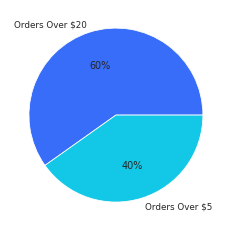

In [48]:
# let's do a pie plot of these values
data = [3688.73, 2477.58]
labels = ['Orders Over $20', 'Orders Over $5']

plt.pie(data, labels=labels, autopct='%.0f%%');

#### Observations:
1. \\$6,166.30 total revenue generated by 25\% on orders over \\$20 and 15\% on orders over \\$5.

In [49]:
# filter orders with over 60 min total time
delivery_over_60 = foodhub[foodhub['total_time']>60]
#delivery_over_60.shape[0]
# calculate the percentage of the whole dataset
percent_over_60 = delivery_over_60.shape[0] / foodhub.shape[0] * 100
print(f'Percentage of orders over 60 min is {str(round(percent_over_60, 2))}')

Percentage of orders over 60 min is 10.54


#### Observations:
The percentage of orders with over 60 minutes total delivery time is 10.54%

In [50]:
# filter weekend orders
weekend_mean_df = foodhub[foodhub['day_of_the_week']=='Weekend']
# get the mean
weekend_delivery_mean = weekend_mean_df['delivery_time'].mean()
print(f'Weekend delivery mean - {str(round(weekend_delivery_mean, 2))}')

Weekend delivery mean - 22.47


In [51]:
# filter weekday orders
weekday_mean_df = foodhub[foodhub['day_of_the_week']=='Weekday']
# get the mean
weekday_delivery_mean = weekday_mean_df['delivery_time'].mean()
print(f'Weekday delivery mean - {str(round(weekday_delivery_mean,2))}')
print(f'Weekend beats weekday by {str(round(weekday_delivery_mean - weekend_delivery_mean, 2))} minutes')

Weekday delivery mean - 28.34
Weekend beats weekday by 5.87 minutes


#### Observations:
1. weekend delivery time mean is 22.47 minutes.
2. weekday delivery time mean is 28.34 minutes.

### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Conclusions & Business Recommendations:
1. The highest number of responses to rating is 'not given'.  Looking more closely into processess or changes to the interface to encourage people to give a rating should improve this metric.
2. The top 5 restaurants by number of orders represent american, italian and japanese cuisines.  Perhaps consider marketing efforts that would target restaurants of these types.
3. Across all cuisine types weekend days are when the most orders get placed.
4. Prep time, delivery time, and cost of order do not seem to be influencing the rating given by any significant measure.  It would seem that these three metrics are in a reasonable range in regard to customer satification.
5.  Weekday average delivery time is higher by almost 6 minutes and 10.5% of all orders have a total delivery time of over 60 minutes.  Investigate what changes occur on the weekend days vs. weekdays in regard to delivery processess.
6. Revenue generated by charging 25% & 15% on orders between \\$5 and \\$20 would be over $6,000 of revenue, a significant number.